In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
house=pd.read_csv('boston_prices.csv')
house.head()

,CRIM,ZN,INDUS,Charles River dummy variable,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
house.rename(columns={'MEDV':'Price'},inplace=True)

In [4]:
house.shape

(506, 14)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CRIM                          506 non-null    float64
 1   ZN                            506 non-null    float64
 2   INDUS                         506 non-null    float64
 3   Charles River dummy variable  506 non-null    float64
 4   nitric oxides concentration   506 non-null    float64
 5   #rooms/dwelling               506 non-null    float64
 6   AGE                           506 non-null    float64
 7   DIS                           506 non-null    float64
 8   RAD                           506 non-null    int64  
 9   TAX                           506 non-null    float64
 10  PTRATIO                       506 non-null    float64
 11  B                             506 non-null    float64
 12  LSTAT                         506 non-null    float64
 13  Price

In [6]:
house.isnull().sum()

CRIM                             0
ZN                               0
INDUS                            0
Charles River dummy variable     0
nitric oxides concentration      0
#rooms/dwelling                  0
AGE                              0
DIS                              0
RAD                              0
TAX                              0
PTRATIO                          0
B                                0
LSTAT                            0
Price                           54
dtype: int64

In [7]:
house.dropna(subset=['Price'],inplace=True)

In [8]:
house.describe()

,CRIM,ZN,INDUS,Charles River dummy variable,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [9]:
house.shape

(452, 14)

## multivariate anaylsis

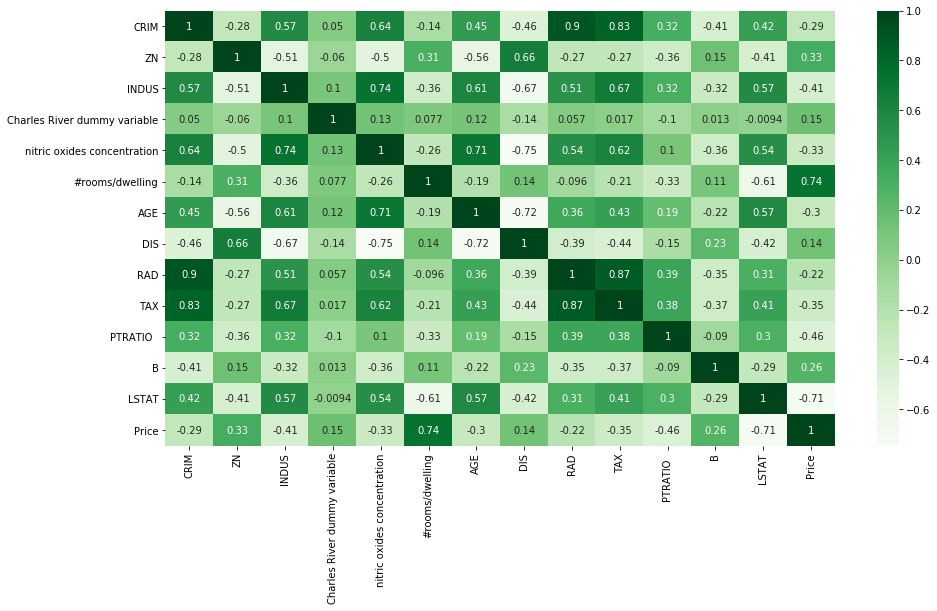

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(house.corr(),annot=True,cmap='Greens')

# Train and Test model

In [11]:
X=house.drop('Price',axis=1)
y=house['Price']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15)

# model building
- 1. linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [14]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(reg.score(X_train,y_train))
reg.score(X_test,y_test)

0.7356878746463908


0.7358486345683506

In [16]:
reg.intercept_

31.27991902292764

In [17]:
reg.coef_

array([-8.47963071e-02,  5.56128122e-02,  1.02925271e-01,  1.99635293e+00,
       -1.82633862e+01,  4.29259080e+00,  5.72409894e-03, -1.49299006e+00,
        3.00910240e-01, -1.31577631e-02, -9.24333730e-01,  1.27787611e-02,
       -5.52228023e-01])

In [18]:
coeffecients=pd.DataFrame([X_test.columns,reg.coef_])
coeffecients.rename(rows={0:'Attribute',1:"coeffecient"},inplace=True)
coeffecients

TypeError: rename() got an unexpected keyword argument 'rows'

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R^2:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
plt.scatter(y_pred,y_test-y_pred)

In [ ]:
sns.distplot(y_test-y_pred)